In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

In [2]:
import numpy as np

def build_synthetic(n_each=3000, n_classes=5, dims=2, std=0.6, seed=None):

    if seed is not None:
        np.random.seed(seed)

    total = n_each * n_classes
    X = np.zeros((total, dims))
    y = np.zeros(total, dtype=int)

    # Predefined centers for up to 5 classes
    predefined_centers = [
        (-2.5, -2.0),
        (-2.0,  2.0),
        (0.5,   0.0),
        (2.5,  -1.5),
        (2.0,   2.5)
    ]

    # If more classes, generate random centers
    if n_classes <= len(predefined_centers):
        centers = predefined_centers[:n_classes]
    else:
        centers = [(np.random.uniform(-3, 3), np.random.uniform(-3, 3)) for _ in range(n_classes)]

    # Generate points per class
    ptr = 0
    for cid, (cx, cy) in enumerate(centers):
        pts = np.random.randn(n_each, dims) * std
        pts[:, 0] += cx
        pts[:, 1] += cy
        X[ptr:ptr+n_each] = pts
        y[ptr:ptr+n_each] = cid
        ptr += n_each

    # Shuffle dataset
    idx = np.random.permutation(total)
    return X[idx], y[idx]


# =========================
# Example Usage
# =========================

X, y = build_synthetic(n_each=1000, n_classes=5, dims=2, std=0.5, seed=42)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique classes:", np.unique(y))


X shape: (5000, 2)
y shape: (5000,)
Unique classes: [0 1 2 3 4]


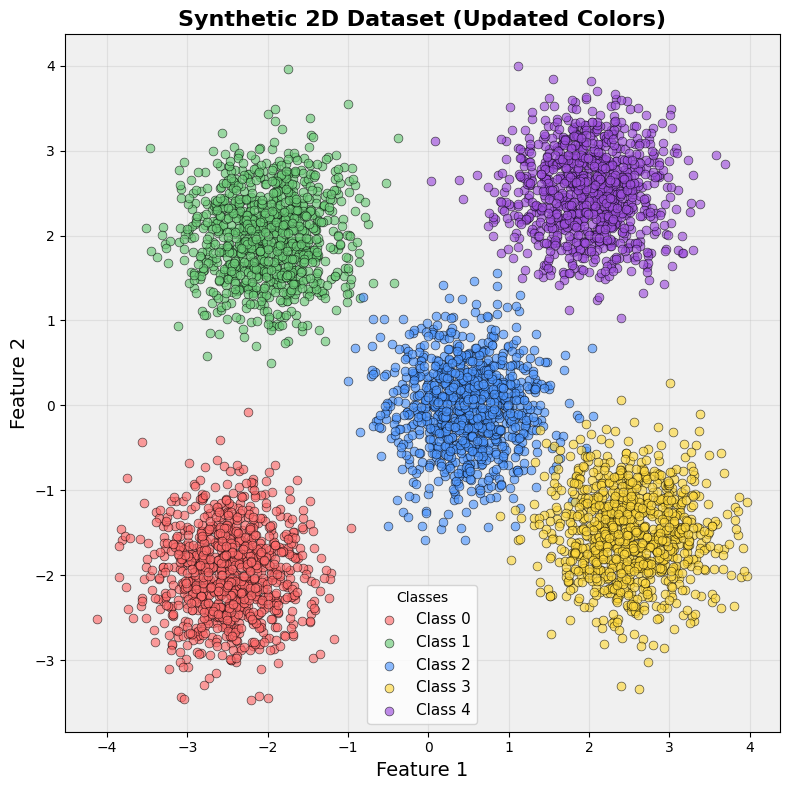

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# Dynamic Color Palette
# ==============================
n_classes = len(np.unique(y))

# New pastel/modern palette
base_colors = ["#ff6b6b", "#6bcB77", "#4d96ff", "#ffd93d", "#9d4edd",
               "#ff9f1c", "#2ec4b6", "#f72585", "#4361ee", "#f15bb5"]

if n_classes > len(base_colors):
    # Generate additional colors if needed
    cmap = plt.cm.get_cmap("tab20", n_classes)
    palette = [cmap(i) for i in range(n_classes)]
else:
    palette = base_colors[:n_classes]

# ==============================
# Plotting
# ==============================
plt.figure(figsize=(8, 8))

for cid in range(n_classes):
    mask = (y == cid)
    plt.scatter(
        X[mask, 0], X[mask, 1],
        s=40,                  # marker size
        alpha=0.65,            # slightly transparent
        c=[palette[cid]],      # color
        edgecolor="k",         # black edge
        linewidth=0.5,
        label=f"Class {cid}"
    )

# ==============================
# Styling
# ==============================
plt.title("Synthetic 2D Dataset (Updated Colors)", fontsize=16, weight="bold")
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(title="Classes", fontsize=11)
plt.grid(True, alpha=0.25)
plt.gca().set_facecolor("#f0f0f0")  # soft light gray background
plt.tight_layout()
plt.show()


In [6]:
import numpy as np

def train_test_split_numpy(X, y, test_ratio=0.2, seed=None):
    if seed is not None:
        np.random.seed(seed)

    N = X.shape[0]
    indices = np.random.permutation(N)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    test_size = int(N * test_ratio)
    X_train = X_shuffled[:-test_size]
    y_train = y_shuffled[:-test_size]
    X_test = X_shuffled[-test_size:]
    y_test = y_shuffled[-test_size:]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_numpy(X, y, test_ratio=0.2, seed=42)


In [7]:
import numpy as np

def one_hot_encode(y, num_classes=5):
    N = y.shape[0]
    onehot = np.zeros((N, num_classes), dtype=float)
    onehot[np.arange(N), y] = 1.0
    return onehot


In [9]:
num_classes = 5
X_train, X_test, y_train, y_test = train_test_split_numpy(X, y, test_ratio=0.2, seed=42)

mean = X_train.mean(axis=0, keepdims=True)
std  = X_train.std(axis=0, keepdims=True) + 1e-8

X_train_norm = (X_train - mean) / std
X_test_norm  = (X_test  - mean) / std

Y_train_oh = one_hot_encode(y_train, num_classes)
Y_test_oh  = one_hot_encode(y_test, num_classes)


In [11]:
num_classes = 5
X_train, X_test, y_train, y_test = train_test_split_numpy(X, y, test_ratio=0.2)

mean = X_train.mean(axis=0, keepdims=True)
std  = X_train.std(axis=0, keepdims=True) + 1e-8

X_train_norm = (X_train - mean) / std
X_test_norm  = (X_test  - mean) / std

Y_train_oh = one_hot_encode(y_train, num_classes)
Y_test_oh  = one_hot_encode(y_test, num_classes)

print("Train X:", X_train_norm.shape, "Train Y one-hot:", Y_train_oh.shape)
print("Test  X:", X_test_norm.shape,  "Test  Y one-hot:", Y_test_oh.shape)

Train X: (4000, 2) Train Y one-hot: (4000, 5)
Test  X: (1000, 2) Test  Y one-hot: (1000, 5)


In [13]:
import numpy as np

class ThreeHiddenLayerNN:
    def __init__(self, input_dim, h1, h2, h3, output_dim, learning_rate=0.1):
        self.lr = learning_rate

        self.W_IH1  = np.random.randn(input_dim, h1)  / np.sqrt(input_dim)
        self.W_H1H2 = np.random.randn(h1, h2)         / np.sqrt(h1)
        self.W_H2H3 = np.random.randn(h2, h3)         / np.sqrt(h2)
        self.W_H3O  = np.random.randn(h3, output_dim) / np.sqrt(h3)

        self.b1 = np.zeros((1, h1))
        self.b2 = np.zeros((1, h2))
        self.b3 = np.zeros((1, h3))
        self.b4 = np.zeros((1, output_dim))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        grad = np.zeros_like(x)
        grad[x > 0] = 1.0
        return grad

    def softmax(self, x):
        x_shifted = x - np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x_shifted)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.z1 = np.dot(X, self.W_IH1) + self.b1
        self.a1 = self.relu(self.z1)

        self.z2 = np.dot(self.a1, self.W_H1H2) + self.b2
        self.a2 = self.relu(self.z2)

        self.z3 = np.dot(self.a2, self.W_H2H3) + self.b3
        self.a3 = self.relu(self.z3)

        self.z4 = np.dot(self.a3, self.W_H3O) + self.b4
        self.a4 = self.softmax(self.z4)

        return self.a4

    def cross_entropy(self, Y_true, Y_pred):
        eps = 1e-8
        Y_pred_clipped = np.clip(Y_pred, eps, 1.0 - eps)
        ce = -np.sum(Y_true * np.log(Y_pred_clipped), axis=1)
        return np.mean(ce)

    def backPropagation(self, X, Y_true, Y_pred):
        N = X.shape[0]

        dZ4 = (Y_pred - Y_true) / N
        dW_H3O = np.dot(self.a3.T, dZ4)
        db4 = np.sum(dZ4, axis=0, keepdims=True)

        dA3 = np.dot(dZ4, self.W_H3O.T)
        dZ3 = dA3 * self.relu_derivative(self.z3)
        dW_H2H3 = np.dot(self.a2.T, dZ3)
        db3 = np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.W_H2H3.T)
        dZ2 = dA2 * self.relu_derivative(self.z2)
        dW_H1H2 = np.dot(self.a1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W_H1H2.T)
        dZ1 = dA1 * self.relu_derivative(self.z1)
        dW_IH1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        self.W_H3O  -= self.lr * dW_H3O
        self.b4     -= self.lr * db4

        self.W_H2H3 -= self.lr * dW_H2H3
        self.b3     -= self.lr * db3

        self.W_H1H2 -= self.lr * dW_H1H2
        self.b2     -= self.lr * db2

        self.W_IH1  -= self.lr * dW_IH1
        self.b1     -= self.lr * db1

    def train_step(self, X, Y_true):
        Y_pred = self.feedForward(X)
        loss = self.cross_entropy(Y_true, Y_pred)
        self.backPropagation(X, Y_true, Y_pred)
        return loss

    def predict_proba(self, X):
        return self.feedForward(X)

    def predict_class(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)


In [14]:
input_dim = X_train_norm.shape[1]
h1, h2, h3 = 32, 24, 16
output_dim = num_classes

model = ThreeHiddenLayerNN(input_dim, h1, h2, h3, output_dim, learning_rate=0.1)

num_epochs = 4000
train_losses, test_losses = [], []
train_accs, test_accs = [], []

def accuracy_np(y_true, y_pred):
    return np.mean(y_true == y_pred)

for epoch in range(num_epochs):

    # Training Step
    loss_train = model.train_step(X_train_norm, Y_train_oh)
    train_losses.append(loss_train)

    # Test Loss
    probs_test = model.predict_proba(X_test_norm)
    loss_test = model.cross_entropy(Y_test_oh, probs_test)
    test_losses.append(loss_test)

    # Accuracy
    pred_train = model.predict_class(X_train_norm)
    pred_test  = model.predict_class(X_test_norm)
    acc_train  = accuracy_np(y_train, pred_train)
    acc_test   = accuracy_np(y_test, pred_test)

    train_accs.append(acc_train)
    test_accs.append(acc_test)

    # Print Progress
    if epoch % 400 == 0:
        print(f"Epoch {epoch:4d} | "
              f"Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}, "
              f"Accuracy = {acc_train:.3f}, Test Acc = {acc_test:.3f}")


Epoch    0 | Loss = 1.6864, Test Loss = 1.5629, Accuracy = 0.398, Test Acc = 0.397
Epoch  400 | Loss = 0.0256, Test Loss = 0.0253, Accuracy = 0.995, Test Acc = 0.993
Epoch  800 | Loss = 0.0142, Test Loss = 0.0137, Accuracy = 0.996, Test Acc = 0.996
Epoch 1200 | Loss = 0.0117, Test Loss = 0.0113, Accuracy = 0.997, Test Acc = 0.996
Epoch 1600 | Loss = 0.0107, Test Loss = 0.0106, Accuracy = 0.997, Test Acc = 0.996
Epoch 2000 | Loss = 0.0103, Test Loss = 0.0103, Accuracy = 0.997, Test Acc = 0.996
Epoch 2400 | Loss = 0.0100, Test Loss = 0.0103, Accuracy = 0.997, Test Acc = 0.995
Epoch 2800 | Loss = 0.0098, Test Loss = 0.0103, Accuracy = 0.997, Test Acc = 0.995
Epoch 3200 | Loss = 0.0096, Test Loss = 0.0103, Accuracy = 0.997, Test Acc = 0.995
Epoch 3600 | Loss = 0.0095, Test Loss = 0.0103, Accuracy = 0.997, Test Acc = 0.995


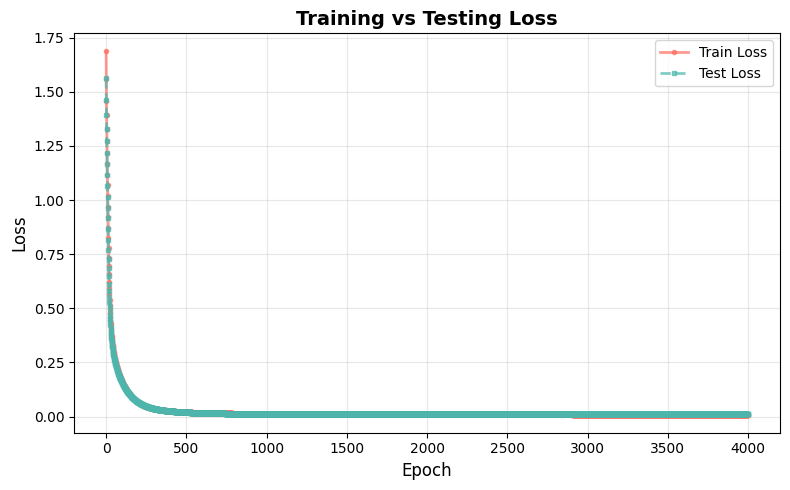

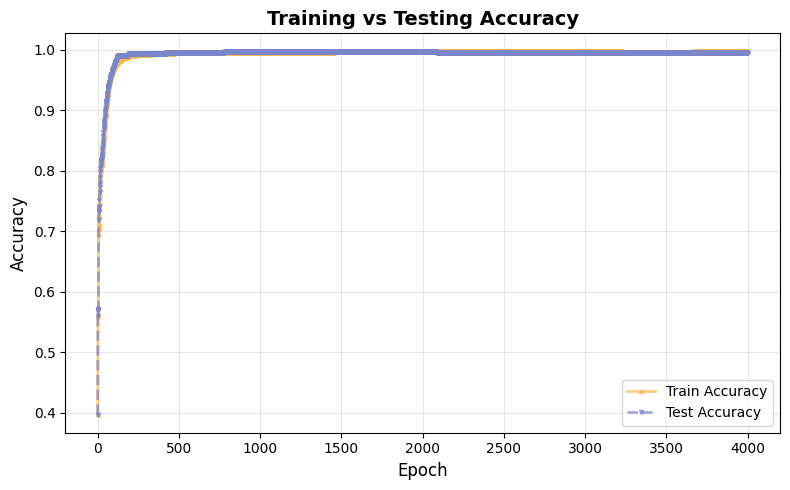

In [15]:
import matplotlib.pyplot as plt
import numpy as np

epochs_axis = np.arange(num_epochs)

# Graph 1: Loss (Train + Test)
plt.figure(figsize=(8, 5))
plt.plot(epochs_axis, train_losses, label="Train Loss", color="#ff6f61", linewidth=2, linestyle="-", marker="o", markersize=3, alpha=0.7)
plt.plot(epochs_axis, test_losses, label="Test Loss", color="#4db6ac", linewidth=2, linestyle="--", marker="s", markersize=3, alpha=0.7)
plt.title("Training vs Testing Loss", fontsize=14, weight="bold")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Graph 2: Accuracy (Train + Test)
plt.figure(figsize=(8, 5))
plt.plot(epochs_axis, train_accs, label="Train Accuracy", color="#ffb74d", linewidth=2, linestyle="-", marker="^", markersize=3, alpha=0.7)
plt.plot(epochs_axis, test_accs, label="Test Accuracy", color="#7986cb", linewidth=2, linestyle="--", marker="v", markersize=3, alpha=0.7)
plt.title("Training vs Testing Accuracy", fontsize=14, weight="bold")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


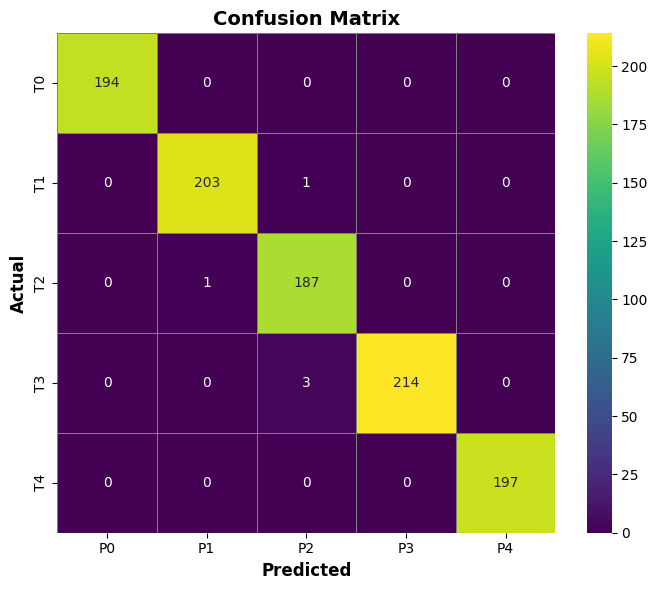


Class-wise Scores:
Class 0: Precision=1.000, Recall=1.000, F1=1.000
Class 1: Precision=0.995, Recall=0.995, F1=0.995
Class 2: Precision=0.979, Recall=0.995, F1=0.987
Class 3: Precision=1.000, Recall=0.986, F1=0.993
Class 4: Precision=1.000, Recall=1.000, F1=1.000

Overall Accuracy: 0.995
Macro Precision: 0.995
Macro Recall: 0.995
Macro F1: 0.995


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_test = model.predict_class(X_test_norm)

def make_cm(true_labels, pred_labels, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        cm[t, p] += 1
    return cm

matrix = make_cm(y_test, y_pred_test, num_classes)

plt.figure(figsize=(7, 6))
sns.heatmap(
    matrix,
    annot=True,
    fmt="d",
    cmap="viridis",             # changed to viridis for better contrast
    cbar=True,
    xticklabels=[f"P{i}" for i in range(num_classes)],
    yticklabels=[f"T{i}" for i in range(num_classes)],
    linewidths=0.5,
    linecolor="gray"
)
plt.xlabel("Predicted", fontsize=12, weight="bold")
plt.ylabel("Actual", fontsize=12, weight="bold")
plt.title("Confusion Matrix", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

def class_scores(cm):
    k = cm.shape[0]
    precision, recall, f1 = [], [], []
    for i in range(k):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        p = tp / (tp + fp) if tp + fp else 0
        r = tp / (tp + fn) if tp + fn else 0
        f = (2 * p * r) / (p + r) if p + r else 0
        precision.append(p)
        recall.append(r)
        f1.append(f)
    return np.array(precision), np.array(recall), np.array(f1)

p_vals, r_vals, f_vals = class_scores(matrix)

print("\nClass-wise Scores:")
for i in range(num_classes):
    print(f"Class {i}: Precision={p_vals[i]:.3f}, Recall={r_vals[i]:.3f}, F1={f_vals[i]:.3f}")

overall_acc = np.mean(y_test == y_pred_test)
macro_p = p_vals.mean()
macro_r = r_vals.mean()
macro_f = f_vals.mean()

print("\nOverall Accuracy:", f"{overall_acc:.3f}")
print("Macro Precision:", f"{macro_p:.3f}")
print("Macro Recall:", f"{macro_r:.3f}")
print("Macro F1:", f"{macro_f:.3f}")


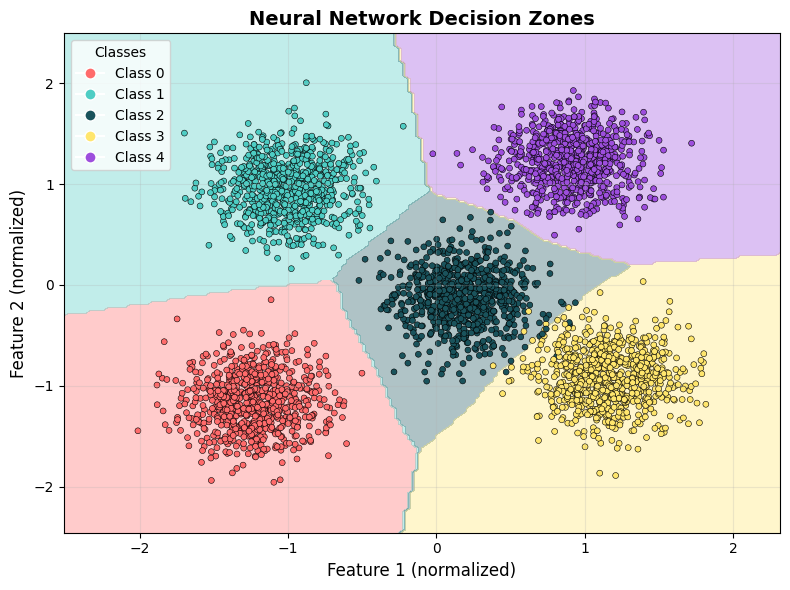

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

shade_colors = ["#ff6b6b", "#4ecdc4", "#1a535c", "#ffe66d", "#9d4edd"]
boundary_map = ListedColormap(shade_colors[:num_classes])

step = 0.03

x_lo, x_hi = X_train_norm[:, 0].min() - 0.5, X_train_norm[:, 0].max() + 0.5
y_lo, y_hi = X_train_norm[:, 1].min() - 0.5, X_train_norm[:, 1].max() + 0.5

grid_x, grid_y = np.meshgrid(
    np.arange(x_lo, x_hi, step),
    np.arange(y_lo, y_hi, step)
)

pts = np.column_stack((grid_x.ravel(), grid_y.ravel()))
pred_grid = model.predict_class(pts).reshape(grid_x.shape)

plt.figure(figsize=(8, 6))

plt.contourf(
    grid_x, grid_y, pred_grid,
    levels=np.arange(num_classes + 1) - 0.5,
    cmap=boundary_map,
    alpha=0.35
)

plt.scatter(
    X_train_norm[:, 0],
    X_train_norm[:, 1],
    c=y_train,
    cmap=boundary_map,
    s=18,
    edgecolors="k",
    linewidth=0.4
)

markers = [
    plt.Line2D([0], [0],
               marker="o",
               color="w",
               markerfacecolor=shade_colors[i],
               markersize=8,
               label=f"Class {i}")
    for i in range(num_classes)
]

plt.legend(handles=markers, title="Classes", fontsize=10)
plt.title("Neural Network Decision Zones", fontsize=14, weight="bold")
plt.xlabel("Feature 1 (normalized)", fontsize=12)
plt.ylabel("Feature 2 (normalized)", fontsize=12)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()
